<h1 style="text-align:center; font-size:300%;">Mini-projet</h1>


# Rapport sur la Détection des Ransomwares à l'aide de l'Arbre de Décision

## Introduction

Les ransomwares représentent une menace majeure pour la sécurité informatique, entraînant des pertes de données et des dommages financiers considérables pour les organisations et les particuliers. L'objectif de ce projet est de développer un modèle de détection des ransomwares en utilisant des techniques d'apprentissage automatique, en particulier l'algorithme d'arbre de décision.

## Objectifs du Projet

- Collecter un ensemble de données contenant à la fois des exemples de fichiers sains et des exemples de fichiers infectés par des ransomwares.
- Prétraiter les données en extrayant des fonctionnalités pertinentes à partir des fichiers.
- Développer un modèle de détection des ransomwares en utilisant l'algorithme d'arbre de décision.
- Évaluer les performances du modèle sur un ensemble de données de test et optimiser le modèle si nécessaire.

## Modèle d'Arbre de Décision

Le modèle d'arbre de décision est une méthode puissante pour détecter les ransomwares. Il utilise une structure en arborescence où chaque nœud représente une caractéristique, chaque branche une décision basée sur cette caractéristique, et chaque feuille donne un résultat (sain ou infecté). Voici comment il est utilisé dans ce projet :

- **Collecte et Prétraitement des Données :** Les données sont collectées, contenant à la fois des fichiers sains et des fichiers infectés par des ransomwares. Ensuite, elles sont prétraitées pour extraire des fonctionnalités pertinentes, telles que la taille du fichier, les entêtes, etc.

- **Construction de l'Arbre de Décision :** L'algorithme sélectionne la meilleure caractéristique pour diviser les données en sous-groupes homogènes (sains ou infectés). Ce processus est répété jusqu'à atteindre un critère d'arrêt, comme une profondeur maximale de l'arbre.

- **Évaluation du Modèle :** Une fois construit, le modèle est évalué sur un ensemble de données de test pour mesurer sa performance avec des métriques telles que la précision et le rappel.

- **Optimisation du Modèle :** Des techniques d'optimisation peuvent être utilisées pour améliorer les performances, comme ajuster les hyperparamètres de l'arbre ou utiliser la validation croisée.




# 1 - Collecte et Prétraitement des Données
## 1.1 - Importation des bibliothèques

Pour commencer, nous avons importé les bibliothèques nécessaires à notre projet. Cela comprend des outils pour le traitement de données, la création de modèles, l'évaluation des performances et la visualisation des résultats.


In [19]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
import seaborn as sns



## 1.2 - Chargement et Exploration des Données

Nous avons chargé le jeu de données contenant des informations sur les fichiers, notamment s'ils sont infectés par des ransomwares ou non. Nous avons affiché les informations sur les données et les premières lignes du jeu de données.

In [20]:
data_ransom=pd.read_csv("data/ransomware_dataset.csv")

In [21]:
data_ransom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78556 entries, 0 to 78555
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            78556 non-null  object
 1   md5Hash             78556 non-null  object
 2   Machine             78556 non-null  int64 
 3   DebugSize           78556 non-null  int64 
 4   DebugRVA            78556 non-null  int64 
 5   MajorImageVersion   78556 non-null  int64 
 6   MajorOSVersion      78556 non-null  int64 
 7   ExportRVA           78556 non-null  int64 
 8   ExportSize          78556 non-null  int64 
 9   IatVRA              78556 non-null  int64 
 10  MajorLinkerVersion  78556 non-null  int64 
 11  MinorLinkerVersion  78556 non-null  int64 
 12  NumberOfSections    78556 non-null  int64 
 13  SizeOfStackReserve  78556 non-null  int64 
 14  DllCharacteristics  78556 non-null  int64 
 15  ResourceSize        78556 non-null  int64 
 16  BitcoinAddresses    78

In [22]:
data_ransom.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


Description du résultat :

RangeIndex: Il s'agit de l'index de lignes du DataFrame, allant de 0 à 78555, indiquant le nombre total d'entrées dans le DataFrame.

Data columns: Cette section indique les colonnes du DataFrame avec leurs caractéristiques respectives :

- Column: Le nom de la colonne.
- Non-Null Count: Le nombre de valeurs non nulles dans la colonne.
- Dtype: Le type de données de la colonne (int64 pour les entiers et object pour les chaînes de caractères).

Voici la signification des colonnes :

- FileName et md5Hash: Les noms de fichier et leurs hachages MD5 associés.
- Machine: Un entier représentant la machine cible.
- DebugSize, DebugRVA, MajorImageVersion, MajorOSVersion, ExportRVA, ExportSize, IatVRA, MajorLinkerVersion, MinorLinkerVersion, NumberOfSections, SizeOfStackReserve, DllCharacteristics, ResourceSize, BitcoinAddresses: Diverses caractéristiques techniques des fichiers analysés.
- Benign: Une colonne binaire (0 ou 1) indiquant si le fichier est sain (0) ou infecté par un ransomware (1).
- Memory Usage: La quantité de mémoire utilisée pour stocker ce DataFrame, ici environ 10.8 Mo.


## 1.3 - Analyse Exploratoire des Données

Nous avons effectué une analyse exploratoire des données pour mieux comprendre la répartition des classes cibles. Nous avons également examiné la corrélation entre les différentes fonctionnalités à l'aide d'une matrice de corrélation et effectué une analyse univariée et bivariée pour visualiser les relations entre les variables.


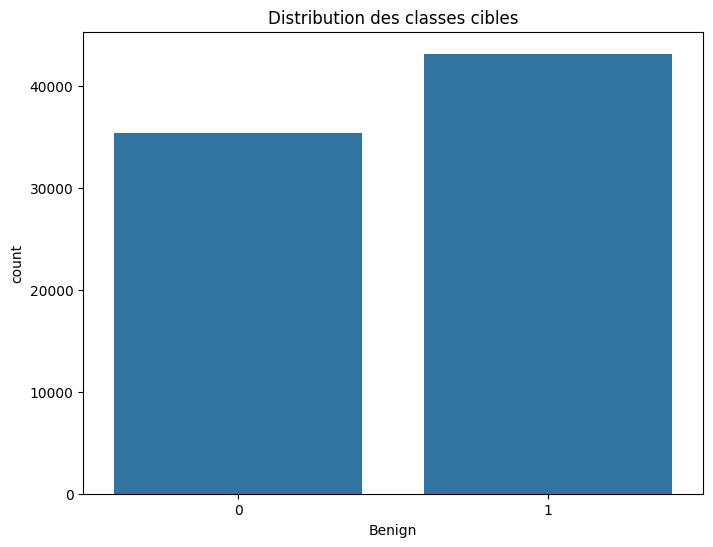

In [23]:
# Distribution des classes cibles
plt.figure(figsize=(8, 6))
sns.countplot(x='Benign', data=data_ransom)
plt.title('Distribution des classes cibles')
plt.show()

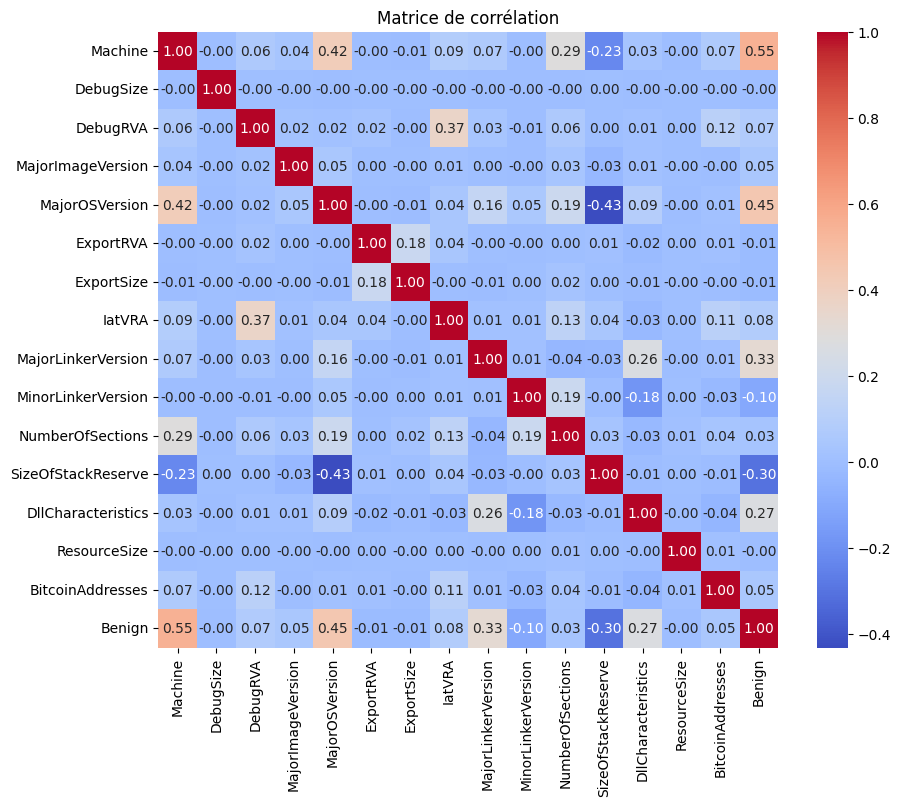

In [24]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
X_data = data_ransom.drop(columns=["FileName", "md5Hash"])  
sns.heatmap(X_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

La matrice de corrélation est une représentation tabulaire des corrélations entre les différentes variables d'un ensemble de données. Chaque cellule de la matrice affiche le coefficient de corrélation entre deux variables. Le coefficient de corrélation mesure la force et la direction de la relation linéaire entre deux variables. Il varie de -1 à 1 :

- Une corrélation de 1 indique une corrélation positive parfaite, ce qui signifie que les variables évoluent dans la même direction.
- Une corrélation de -1 indique une corrélation négative parfaite, ce qui signifie que les variables évoluent dans des directions opposées.
- Une corrélation de 0 indique qu'il n'y a aucune corrélation linéaire entre les variables.

Dans le contexte de l'analyse des ransomwares, la matrice de corrélation peut aider à identifier les relations entre les différentes caractéristiques des fichiers analysés.


## 1.4 -  Prétraitement des Données

Nous avons séparé les fonctionnalités (X) des étiquettes cibles (y). Nous avons également exclu certaines colonnes telles que le nom du fichier et le hachage MD5, car elles ne contribuent pas à la prédiction du ransomware.


In [25]:
# Diviser les données en features (X) et target (y)
X_data = data_ransom.drop(columns=["Benign", "FileName", "md5Hash"])  
y_data = data_ransom["Benign"]


In [26]:
X_data.info()
X_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78556 entries, 0 to 78555
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             78556 non-null  int64
 1   DebugSize           78556 non-null  int64
 2   DebugRVA            78556 non-null  int64
 3   MajorImageVersion   78556 non-null  int64
 4   MajorOSVersion      78556 non-null  int64
 5   ExportRVA           78556 non-null  int64
 6   ExportSize          78556 non-null  int64
 7   IatVRA              78556 non-null  int64
 8   MajorLinkerVersion  78556 non-null  int64
 9   MinorLinkerVersion  78556 non-null  int64
 10  NumberOfSections    78556 non-null  int64
 11  SizeOfStackReserve  78556 non-null  int64
 12  DllCharacteristics  78556 non-null  int64
 13  ResourceSize        78556 non-null  int64
 14  BitcoinAddresses    78556 non-null  int64
dtypes: int64(15)
memory usage: 9.0 MB


,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0


In [27]:
y_data.info()
y_data.head()

<class 'pandas.core.series.Series'>
RangeIndex: 78556 entries, 0 to 78555
Series name: Benign
Non-Null Count  Dtype
--------------  -----
78556 non-null  int64
dtypes: int64(1)
memory usage: 613.8 KB


0    1
1    1
2    1
3    1
4    1
Name: Benign, dtype: int64

## 1.5 - Division des Données en Ensembles d'Entraînement et de Test

Nous avons divisé nos données en ensembles d'entraînement et de test pour évaluer les performances du modèle sur des données non vues. Cela permet de vérifier si le modèle généralise bien aux nouvelles données.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=True, random_state=42)

La fonction train_test_split divise un ensemble de données en ensembles d'entraînement et de test pour évaluer un modèle :

- X_data, y_data : Les caractéristiques et les étiquettes cibles de l'ensemble de données.
- test_size : La proportion des données à attribuer à l'ensemble de test.
- shuffle : Indique si les données doivent être mélangées avant la division.
- random_state : Contrôle le comportement de la division aléatoire, assurant la reproductibilité des résultats.


# 2 - Construction de l'Arbre de Décision
## 2.1 - Création du Modèle d'Arbre de Décision

Nous avons instancié un modèle d'arbre de décision et l'avons entraîné sur les données d'entraînement. L'arbre de décision apprend à partir des caractéristiques des données pour faire des prédictions sur la classe cible (infecté ou non par un ransomware).


In [29]:
tree_model = DecisionTreeClassifier(random_state=42)


L'argument "random_state=42" est utilisé pour contrôler le comportement de la division aléatoire des données lors de l'utilisation de la fonction train_test_split. 

## 2.2 - Entraînement  du Modèle d'Arbre de Décision

In [30]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 3 - Évaluation du Modèle
## 3.1 - Évaluation des Performances du Modèle

Nous avons utilisé l'ensemble de test pour évaluer les performances du modèle. Nous avons affiché la matrice de confusion, qui montre les vrais positifs, faux positifs, vrais négatifs et faux négatifs, ainsi qu'un rapport de classification fournissant des mesures telles que la précision, le rappel et le F-score.


In [31]:
# Faire des prédictions sur l'ensemble de test
y_pred = tree_model.predict(X_test)

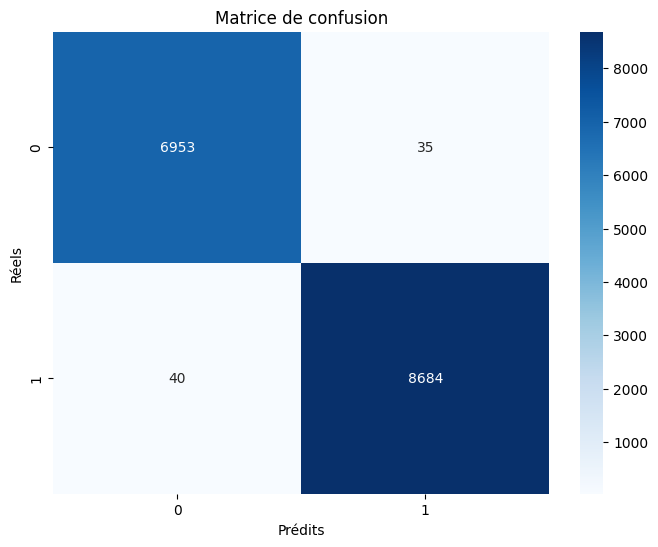


Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6988
           1       1.00      1.00      1.00      8724

    accuracy                           1.00     15712
   macro avg       1.00      1.00      1.00     15712
weighted avg       1.00      1.00      1.00     15712



In [32]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion')
plt.show()

# Affichage du rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

La matrice de confusion est un outil essentiel pour évaluer les performances d'un modèle de classification. Elle permet de visualiser la performance du modèle en comparant les prédictions avec les valeurs réelles. Voici une description de la matrice de confusion donnée :

- Vrais positifs (VP) : Il y a 6953 vrais positifs. Cela signifie que le modèle a correctement prédit 6953 échantillons comme positifs (dans la classe "infecté par un ransomware") et qu'ils étaient en effet positifs.
- Faux négatifs (FN) : Il y a 35 faux négatifs. Cela signifie que le modèle a prédit à tort 35 échantillons comme négatifs (dans la classe "sain") alors qu'ils étaient en fait positifs.
- Faux positifs (FP) : Il y a 40 faux positifs. Cela signifie que le modèle a prédit à tort 40 échantillons comme positifs alors qu'ils étaient en fait négatifs.
- Vrais négatifs (VN) : Il y a 8684 vrais négatifs. Cela signifie que le modèle a correctement prédit 8684 échantillons comme négatifs et qu'ils étaient en effet négatifs.

La matrice de confusion montre que le modèle a une bonne performance, avec un nombre élevé de vrais positifs et de vrais négatifs, et un nombre relativement faible de faux positifs et de faux négatifs. Cependant, il convient de prêter attention aux faux négatifs, car ils représentent les cas où le modèle a manqué la détection des ransomwares.


En résumé, le modèle de classification présente des performances exceptionnelles, avec des scores élevés de précision, de rappel et de F1 pour les deux classes, ainsi qu'une précision globale parfaite de 1.00. Cela indique que le modèle est très efficace pour distinguer les fichiers sains des fichiers infectés par des ransomwares.

## 3.2 - Visualisation de l'Arbre de Décision

Nous avons visualisé l'arbre de décision entraîné pour mieux comprendre comment il prend des décisions. Cela nous permet d'interpréter le modèle et d'identifier les caractéristiques importantes pour la classification des ransomwares.


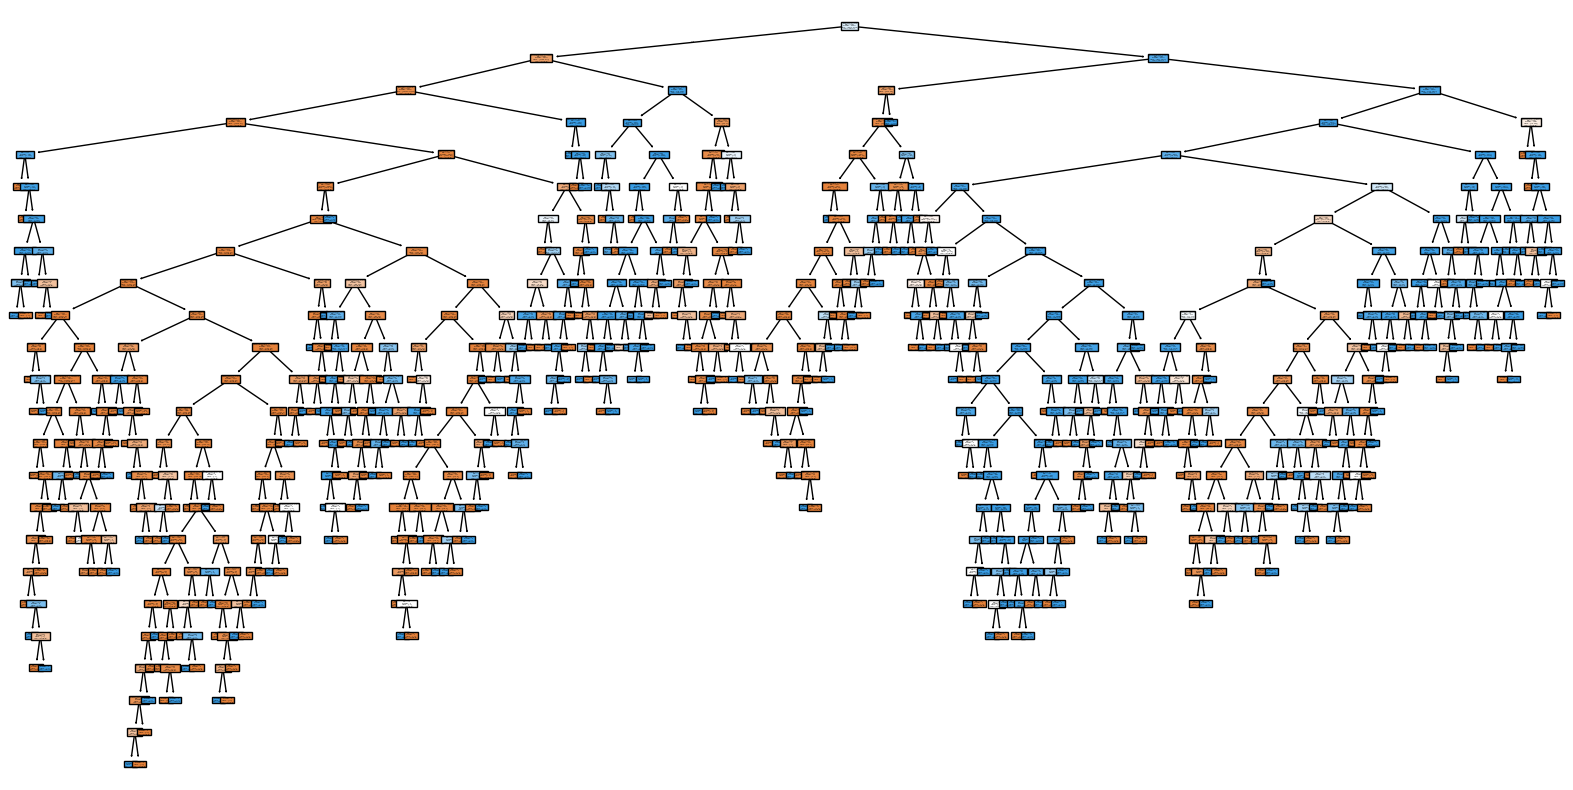

In [33]:
# Convertir l'index des colonnes en une liste des noms de colonnes
feature_names_list = list(X_data.columns)

# Visualiser l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names_list, class_names=["Malveillant", "Inoffensif"])
plt.show()


## 3.3 - Exemples de Prédictions

Nous avons affiché quelques exemples de prédictions sur l'ensemble de test pour illustrer comment le modèle classe les fichiers en fonction de leurs caractéristiques.


In [34]:
# Afficher quelques exemples de test avec leurs prédictions
for i in range(3): 
    example_features = X_test.iloc[i]
    true_label = y_test.iloc[i]
    predicted_label = tree_model.predict([example_features])[0]
    print("Exemple : ", i+1)
    print("Features:", example_features)
    print("Étiquette réelle:", true_label)
    print("Étiquette prédite:", predicted_label)
    print()


Exemple :  1
Features: Machine                  332
DebugSize                 84
DebugRVA                4096
MajorImageVersion         10
MajorOSVersion            10
ExportRVA               4352
ExportSize              1339
IatVRA                     0
MajorLinkerVersion        14
MinorLinkerVersion        10
NumberOfSections           2
SizeOfStackReserve    262144
DllCharacteristics      1344
ResourceSize            1008
BitcoinAddresses           0
Name: 30141, dtype: int64
Étiquette réelle: 1
Étiquette prédite: 1

Exemple :  2
Features: Machine                34404
DebugSize                 28
DebugRVA                4768
MajorImageVersion          6
MajorOSVersion             6
ExportRVA             110304
ExportSize               109
IatVRA                  4096
MajorLinkerVersion         9
MinorLinkerVersion         0
NumberOfSections           5
SizeOfStackReserve    262144
DllCharacteristics       320
ResourceSize            1704
BitcoinAddresses           0
Name: 40237, dty

c:\Users\Anas Br\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Anas Br\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Anas Br\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 3.4 - Sauvegarde du Modèle


In [35]:
import joblib

file_path = "./model_tree_v1.joblib"

joblib.dump(tree_model, file_path)

['./model_tree_v1.joblib']

# 4 - Optimisation du Modèle

## 4.1 - Réglage des Hyperparamètres

L'optimisation des hyperparamètres consiste à rechercher les meilleures valeurs pour les paramètres du modèle qui ne sont pas appris directement à partir des données d'entraînement. Dans le cas de l'arbre de décision, des hyperparamètres tels que la profondeur maximale de l'arbre, le nombre minimum d'échantillons requis pour diviser un nœud ou le critère de division peuvent être ajustés pour améliorer les performances du modèle.


In [36]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation du modèle d'arbre de décision
tree_model_opt = DecisionTreeClassifier(random_state=42)

# Recherche des meilleures combinaisons d'hyperparamètres
grid_search = GridSearchCV(estimator=tree_model_opt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

Meilleurs hyperparamètres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


Les meilleurs hyperparamètres trouvés pour notre modèle sont les suivants : 'max_depth': 20, 'min_samples_leaf': 1, et 'min_samples_split': 2. Ces hyperparamètres spécifient la structure de l'arbre de décision et peuvent avoir un impact significatif sur ses performances.

- `max_depth` détermine la profondeur maximale de l'arbre.

- `min_samples_leaf` spécifie le nombre minimum d'échantillons requis pour constituer une feuille de l'arbre.

- `min_samples_split` indique le nombre minimum d'échantillons requis pour diviser un nœud interne. Cela peut également aider à contrôler la complexité de l'arbre.


## 4.2 - Validation Croisée

La validation croisée est une technique utile pour évaluer les performances d'un modèle en utilisant différents ensembles de données d'entraînement et de test. Cela permet d'obtenir une estimation plus fiable des performances du modèle et peut aider à éviter le surajustement en évaluant le modèle sur plusieurs ensembles de validation.

In [37]:
# Évaluation des performances avec validation croisée
cross_val_scores = cross_val_score(tree_model_opt, X_train, y_train, cv=5)
print("Scores de validation croisée:", cross_val_scores)
print("Moyenne des scores de validation croisée:", cross_val_scores.mean())

Scores de validation croisée: [0.99665845 0.99626064 0.99570372 0.99403294 0.99546467]
Moyenne des scores de validation croisée: 0.9956240824993585


La moyenne des scores de validation croisée est calculée pour obtenir une estimation globale de la performance du modèle sur l'ensemble des données. Dans notre cas, la moyenne des scores de validation croisée est de 0.9956240824993585.
Un score élevé de validation croisée indique que le modèle est capable de généraliser efficacement aux données non vues, ce qui est un bon indicateur de sa robustesse et de sa capacité à bien se comporter dans des situations réelles.

## 4.3 - Résumé

En explorant ces différentes stratégies d'optimisation, nous pourrions être en mesure d'améliorer encore les performances du modèle d'arbre de décision pour la détection des ransomwares. Cela garantirait que notre modèle est prêt à être déployé dans un environnement de production et à fournir une protection efficace contre les ransomwares.